In [2]:
import yfinance as yf

tesla = yf.Ticker('TSLA')
tesla_data = tesla.history(period='1y')
tesla_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-02-07 00:00:00-05:00,188.179993,189.789993,182.679993,187.580002,111535200,0.0,0.0
2024-02-08 00:00:00-05:00,189.000000,191.619995,185.580002,189.559998,83034000,0.0,0.0
2024-02-09 00:00:00-05:00,190.179993,194.119995,189.479996,193.570007,84476300,0.0,0.0
2024-02-12 00:00:00-05:00,192.110001,194.729996,187.279999,188.130005,95498600,0.0,0.0
2024-02-13 00:00:00-05:00,183.990005,187.259995,182.110001,184.020004,86759500,0.0,0.0


In [4]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [6]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [8]:
tesla =yf.Ticker('TSLA')

In [10]:
esla_data =tesla.history(period="max")

In [14]:
tesla_data.reset_index(inplace=True) 
tesla_data.head(10)

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2024-02-07 00:00:00-05:00,188.179993,189.789993,182.679993,187.580002,111535200,0.0,0.0
1,1,2024-02-08 00:00:00-05:00,189.000000,191.619995,185.580002,189.559998,83034000,0.0,0.0
2,2,2024-02-09 00:00:00-05:00,190.179993,194.119995,189.479996,193.570007,84476300,0.0,0.0
3,3,2024-02-12 00:00:00-05:00,192.110001,194.729996,187.279999,188.130005,95498600,0.0,0.0
4,4,2024-02-13 00:00:00-05:00,183.990005,187.259995,182.110001,184.020004,86759500,0.0,0.0
5,5,2024-02-14 00:00:00-05:00,185.300003,188.889999,183.350006,188.710007,81203000,0.0,0.0
6,6,2024-02-15 00:00:00-05:00,189.160004,200.880005,188.860001,200.449997,120831800,0.0,0.0
7,7,2024-02-16 00:00:00-05:00,202.059998,203.169998,197.399994,199.949997,111173600,0.0,0.0
8,8,2024-02-20 00:00:00-05:00,196.130005,198.600006,189.130005,193.759995,104545800,0.0,0.0
9,9,2024-02-21 00:00:00-05:00,193.360001,199.440002,191.949997,194.770004,103844000,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data

In [145]:
url ='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm' 
html_data  = requests.get(url).text

In [147]:
soup = BeautifulSoup(html_data,"html5lib")

In [149]:
tables = soup.find_all("table")

In [151]:
# Initialize a DataFrame
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

# Find all tables
for table in soup.find_all('table'):
    # Identify the relevant table
    if 'Tesla Quarterly Revenue' in table.find('th').text:
        # Loop through rows
        rows = table.find_all('tr')
        for row in rows:
            col = row.find_all('td')
            if col:
                # Extract and clean data
                date = col[0].text
                revenue = col[1].text.replace(',', '').replace('$', '')
                # Add rows to DataFrame
                new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
                tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)

In [153]:
tesla_revenue.head()

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


In [155]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\\$',"", regex=True)

In [157]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [159]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


## Question 3: Use yfinance to Extract Stock Data

In [108]:
GameStop = yf.Ticker("GME")

In [110]:
gme_data = GameStop.history(period="max")

In [112]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693349,1.603295,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data

In [183]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html' 
gme_data  = requests.get(url).text

In [185]:
soup2 = BeautifulSoup(html_data_2,"html5lib")

In [187]:
# Initialize a DataFrame
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

# Find all tables
for table in soup2.find_all('table'):
    # Identify the relevant table
    if 'GameStop Quarterly Revenue' in table.find('th').text:
        # Loop through rows
        rows = table.find_all('tr')
        for row in rows:
            col = row.find_all('td')
            if col:
                # Extract and clean data
                date = col[0].text
                revenue = col[1].text.replace(',', '').replace('$', '')
                # Add rows to DataFrame
                new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
                gme_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)

In [189]:
gme_revenue.tail()

,Date,Revenue
49,2010-06-30,28
50,2010-03-31,21
51,2009-09-30,46
52,2009-06-30,27
53,2005-01-31,709


## Question 5: Plot Tesla Stock Graph

In [172]:
import pandas as pd
import matplotlib.pyplot as plt

In [176]:
def make_graph(stock_data, revenue_data, title):
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='tab:blue')
    ax1.plot(stock_data['Date'], stock_data['Close'], color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Revenue (Billion $)', color='tab:green')
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='tab:green')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    plt.title(title)
    fig.tight_layout()
    plt.show()

AttributeError: 'America/New_York' object has no attribute 'update'

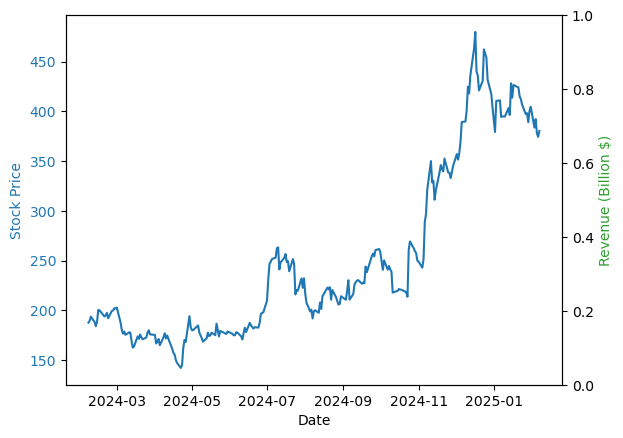

In [178]:
# Call the make_graph function with the sample data and title 'Tesla'
make_graph(tesla_data, tesla_revenue, 'Tesla')

## Question 6: Plot GameStop Stock Graph

TypeError: string indices must be integers, not 'str'

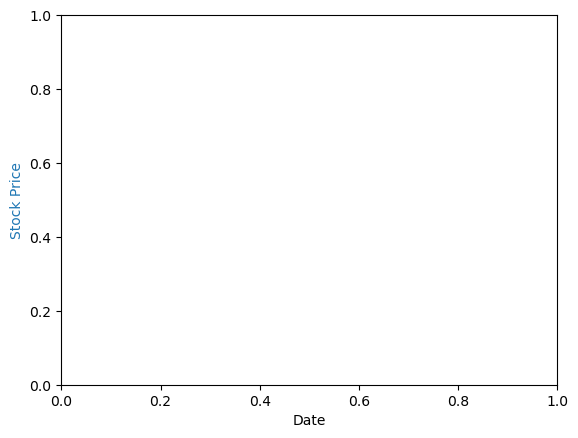

In [193]:
make_graph(gme_data, gme_revenue, 'GameStop')

In [170]:
make_graph(tesla_data, tesla_revenue, "Tesla")

NameError: name 'make_graph' is not defined

In [187]:
make_graph(gme_data, gme_revenue, 'GameStop')

NameError: name 'make_graph' is not defined